Suppose that we have two independent sensitive attributes such as; gender and race. We want to achieve $\alpha_{g}$, $\alpha_{r}$ fairness targets respectively. Then, we can define our problem as having 4 different sensitive groups and we can model it as 4 different fairness targets. They can be defined as follows:
$$\begin{aligned}
\alpha_{g=0,r=0}&=\alpha_{g}\alpha_{r} \\ 
\alpha_{g=0,r=1}&=\alpha_{g}(1-\alpha_{r}) \\ 
\alpha_{g=1,r=0}&=(1-\alpha_{g})\alpha_{r} \\ 
\alpha_{g=1,r=1}&=(1-\alpha_{g})(1-\alpha_{r}) 
\end{aligned}$$

For mean parameters, we can assume the independce again and model them as described above too.
Assume we are given the following problem for two separate sensitive attributes. We can convert the problem to 4 groups problem.

In [1]:
from utils import *
fairness_target_g_r = np.array([0.4, 0.3])
initial_theta_g_r = np.array([0.1, 0.2])

fairness_target = np.zeros([4])
initial_theta = np.zeros([4])
fairness_target_g = np.array([fairness_target_g_r[0],1-fairness_target_g_r[0]])
fairness_target_r = np.array([fairness_target_g_r[1],1-fairness_target_g_r[1]])
initial_theta_g = np.array([initial_theta_g_r[0],1-initial_theta_g_r[0]])
initial_theta_r = np.array([initial_theta_g_r[1],1-initial_theta_g_r[1]])
for i in range(len(fairness_target_g_r)):
    for j in range(len(fairness_target_g_r)):
        fairness_target[i*2+j] = fairness_target_g[i] * fairness_target_r[j]
        initial_theta[i*2+j] = initial_theta_g[i] * initial_theta_r[j]


In [2]:
num_rounds = 2000
lambda_ = 5
eta = 0.005
N = 50
num_instances = 10
num_groups = len(fairness_target)
mean = np.ones(num_groups)*5
std = np.ones(num_groups)
acceptance_ratio = 0.6
decay = 0
applicants, admitteds, thetas = process_multigroup(N, mean, std, acceptance_ratio, fairness_target, initial_theta, lambda_, eta, num_instances, num_rounds, decay)

Processing instance 0


In [3]:
thetas_mean = np.mean(thetas, axis=0)

In [4]:
thetas_mean_g = thetas_mean[:,0]+thetas_mean[:,1]
thetas_mean_r = thetas_mean[:,0]+thetas_mean[:,2]

In [5]:
from matplotlib import rc_file_defaults
import matplotlib.pyplot as plt

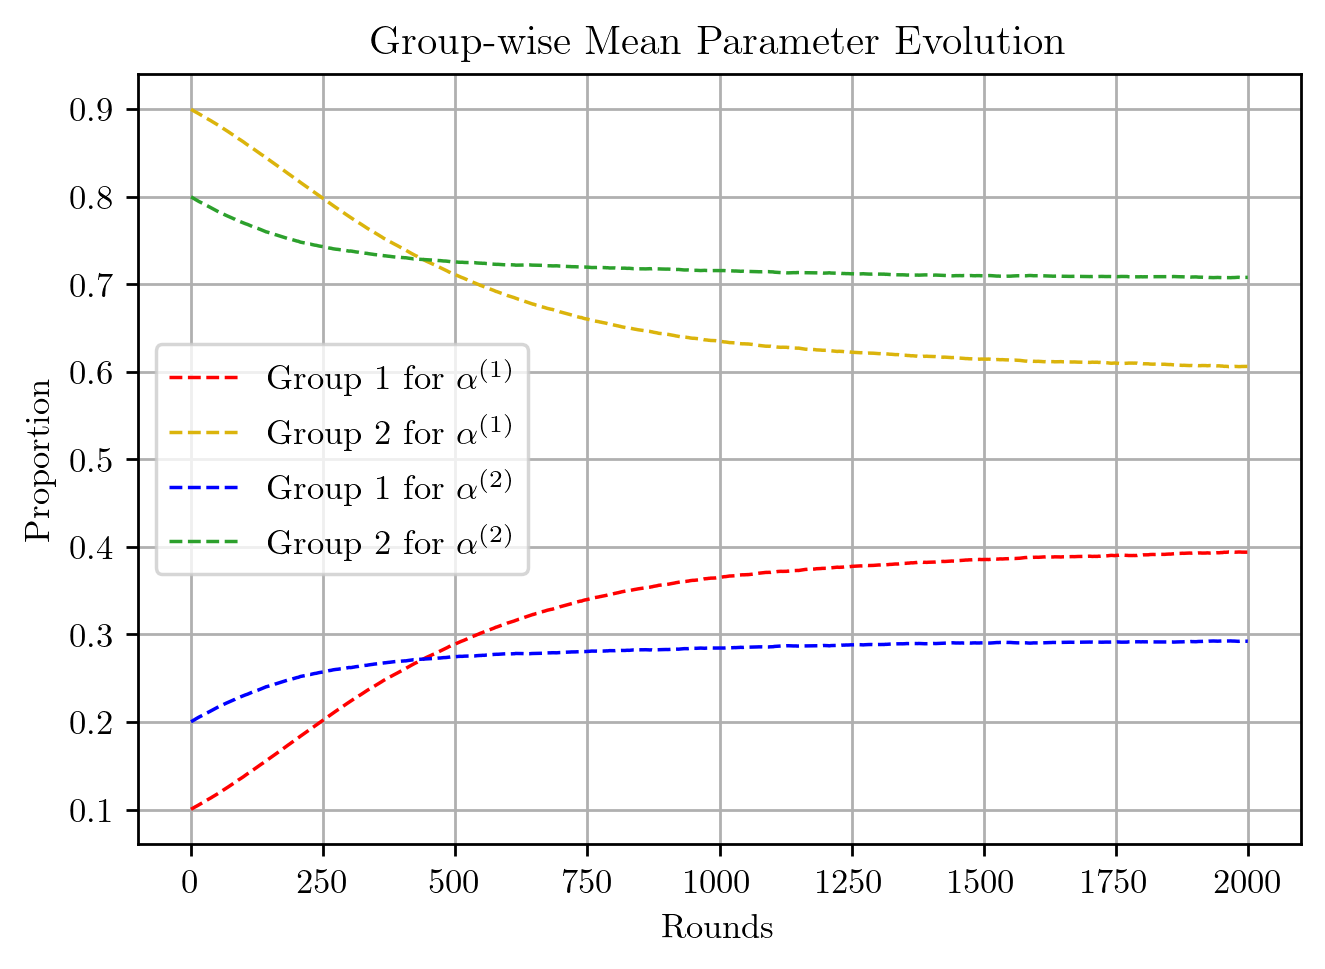

In [6]:
plt.rc('text', usetex = True)
plt.rc('font', family='serif')
width = 6
height = 4
fig, ax = plt.subplots(nrows=1, ncols=1) 
fig.set_size_inches(width, height) #exact size of the figure
fig.set_dpi(250) 
lw = 1
colors = ['#DBB40C','red','blue','tab:green']

ax.plot(thetas_mean_g, '--', label='Group 1 for '+r'$\alpha^{(1)}$', linewidth=lw, c=colors[1])
ax.plot(1-thetas_mean_g, '--', label='Group 2 for '+r'$\alpha^{(1)}$', linewidth=lw, c=colors[0])
ax.plot(thetas_mean_r, '--', label='Group 1 for '+r'$\alpha^{(2)}$', linewidth=lw, c=colors[2])
ax.plot(1-thetas_mean_r, '--', label='Group 2 for '+r'$\alpha^{(2)}$', linewidth=lw, c=colors[3])

ax.set_title('Group-wise Mean Parameter Evolution')
ax.grid()
ax.set_xlabel('Rounds')
ax.set_ylabel('Proportion')
ax.legend()
plt.savefig('results/mean_parameter_evolution_multi_sensitive.pdf', bbox_inches='tight')
plt.show()